## Term Project - Biswajit Sharma

### Introduction

Obesity is a medical condition that is related to the excessive accumulation of body fat. It is not only a cosmetic concern but rather a medical problem that can increase the risk of other health problems and diseases like heart diseases, diabetes, high cholesterol, high blood pressure, liver disease, musculoskeletal disorders, and certain cancers. Since 1997, WHO has considered obesity a global epidemic and a significant health problem. To prevent obesity, various organizations, including government and non-government, are promoting campaigns regarding two main risk factors: eating habits and physical activity (Gozukara et al., 2023).

Although it is known that excessive intake of calories can cause obesity, nutritional factors like low-quality diet, unbalanced diet, processed foods, and alcohol consumption can also increase the risk of obesity. Physical activity has also been very influential in controlling or preventing obesity. The frequency, duration, and intensity of physical activity and exercises play an essential role in the effective prevention and reduction of obesity (Gozukara et al., 2023).This analysis will investigate the relationship of Obesity and Body Mass Index (BMI) with eating habits and physical activity. This study can help to identify patterns associated with obesity, such as the quality and quantity of food intake, frequency, duration, and intensity of physical activity. Furthermore, this study will generate a model to estimate obesity level based on eating habits and physical activity.s.

As mentioned above that managing and early detection of obesity risk have immense benefits. Therefore, it becomes important to invest resources for the early detection of obesity risk. Given below are some importantat outcomes that are the benefits of early detection for both health plan and heathcare plan members.

- Early detection can help members to be aware of their hisk of obesity and take action to manage obesity which will reduce the chances of obesity-related conditions like heart attck, diabetes, hypertension, etc. By preventing these conditions, health insurance plans can help members to stay healthy and improve their well being
- Early dtection of obesity risk allows health plans to intervene and incentivise to motivate members for practising obesity management such as excercise,  healthy eating habits, reduction acohol intake. This reduces the claims related to conditions cause by high obesity and essentially allow health plans to reduce the cost of care including less premium.
- Interventions of healthcare plans to introduce trageted obesity management demonstrate the health plans commitment to their memebers health and well being. Providing targeted obesity management counseling and education enhances the relationship with members and fosters positive brand reputation. This provides competitive advantage, higher memeber retention and hence lower cost of care
- A plan for eating habits and excercise intentisity will fit all memebers. Identification of obesity risk based on eating habits and physical activity will allow the health plans to identify a customized or more targted diet plan and excercise duration for their memebers. Customized and targeted plan increases the chances success for managing obesity than one plan fit all scenario.


**UC Irvine Machine Learning Repository - Obesity levels, Eating Having and Physical activity dataset.**

This dataset include data about eating habits, physical activity, weight, height and obesity levels of individuals from the countries of mexico, Peru and Columbia. The data includes the eating habits and physical activity levels of 498 participants aged between 14 and 61 years ([UCI.2019][1]).

The originally collected data was preprocessed, such as the removal of missing values, and normalization was performed. It was also balanced to reduce the skewness of the obesity levels. 23% of the source data is actual responses collected over a 30-day survey, while the remaining 77% was synthetically generated using SMOTE (Palechor & de la Hoz Manotas, 2019).

There are 17 variables in the dataset.

 - Gender
 - Age
 - Height
 - Weight
 - Family History of overweight
 - Frequency of consumption of high caloric food (FAVC)
 - Frequency of consumption of vegetables (FCVC)
 - Number of main meals (NCP)
 - Consumption of food between meals (CAEC)
 - Daily consumption of water (CH20)
 - Consumption of alcohol (CALC)
 - Calorie consumption monitoring done (SCC)
 - Frequency of Physical activity (FAF)
 - Measuring Physical activity time using devices (TUE)
 - Mode of transportation used (MTRANS)
 - Obesity Level

We will use this dataset to perform analysis and mining of relationship of obesity with eating habits and physical activity. **We will also use this data for prediction of obesity risk based on eating habits and physical activity**

Obesity level is labelled in the source data based on mass body index calculation (Equation. 1) and then compared with data provided by WHO (Palechor & de la Hoz Manotas, 2019).

 - Underweight when BMI Less than 18.5
 - Normal when BMI 18.5 to 24.9
 - Overweight when BMI 25.0 to 29.9
 - Obesity I when BMI 30.0 to 34.9
 - Obesity II when BMI 35.0 to 39.9
 - Obesity III when BMI Higher than 40

[1]: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


We know that Weight and Height together is a deterministic measure of obesity. However, we want to predict the risk of obesity based on eating habits and physical adctivity variables, hence it is better to model based on only one of weight and height, so that model can account for the relationship  on eating habits and physical activity variables rather than weight and height.

In [4]:
#dropping weight from the datatframe
df = df.drop(columns=["Weight", "Height"])

In [5]:
#convert all column names as lower case for consistent names
col_names = {cols: cols.lower()
 for cols in df.columns
}

df = df.rename(columns=col_names)

In [6]:
# view few rows
df.head()

,gender,age,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
numerical_features = ["age", "fcvc", "ncp", "ch2o","faf", "tue"]
# numerical_features = ["age", "height", "fcvc", "ncp", "ch2o","faf", "tue"]
categorical_features = ["gender", "family_history_with_overweight", "favc", "caec", "smoke", "scc", "calc", "mtrans"]
target = "nobeyesdad"

In [8]:
corr_df = df[numerical_features].corr()

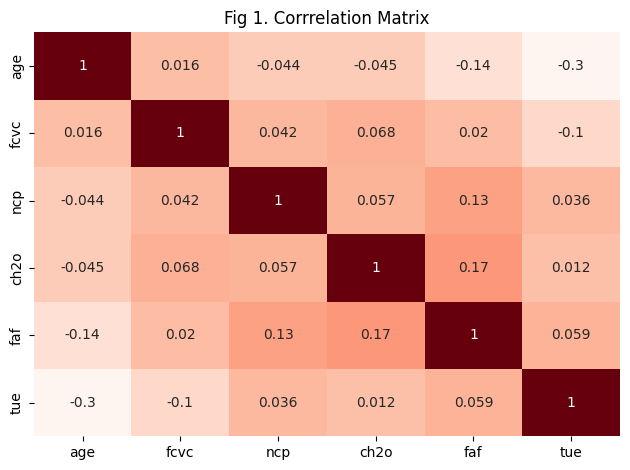

In [9]:
# create correlation matrix heatmap visualization
sns.heatmap(corr_df, annot=True, cmap="Reds", cbar=False)
plt.title("Fig 1. Corrrelation Matrix")
plt.tight_layout()
plt.show()

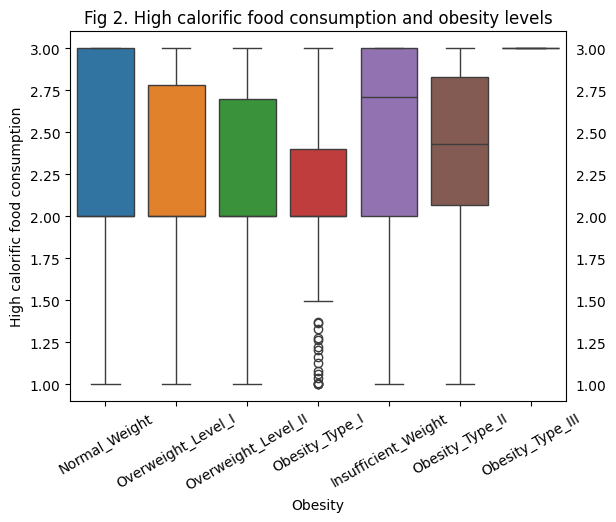

In [10]:
sns.boxplot(x=df["nobeyesdad"], y=df["fcvc"], hue=df["nobeyesdad"])
plt.tick_params(labelright=True)
plt.title("Fig 2. High calorific food consumption and obesity levels")
plt.ylabel("High calorific food consumption")
plt.xlabel("Obesity")
plt.xticks(rotation=30)
plt.show()

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [12]:
df_dummies = pd.get_dummies(df[categorical_features], dtype="int")

In [13]:
df_full_features = pd.concat([df[numerical_features],df_dummies], axis=1)

In [14]:
# using sklearn's train_test_split method to split the dataset
features_train, features_test, target_train, target_test = train_test_split(
    df_full_features, df[target], test_size=0.2, random_state=0
)

In [15]:
decision_tree = DecisionTreeClassifier(random_state=1)

In [16]:
hyperparameters = {
    "max_depth":[10, 20, 50]
}

In [17]:
gcv = GridSearchCV(
    decision_tree,
    hyperparameters,
    cv=5,
    verbose=1
)

In [18]:
target_train

1295         Obesity_Type_I
1627        Obesity_Type_II
1388         Obesity_Type_I
1318         Obesity_Type_I
648     Insufficient_Weight
               ...         
1033    Overweight_Level_II
1731        Obesity_Type_II
763      Overweight_Level_I
835      Overweight_Level_I
1653        Obesity_Type_II
Name: nobeyesdad, Length: 1688, dtype: object

In [19]:
best_model = gcv.fit(features_train, target_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [20]:
best_model.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 1,
 'splitter': 'best'}

In [21]:
predicted_test = best_model.predict(features_test)

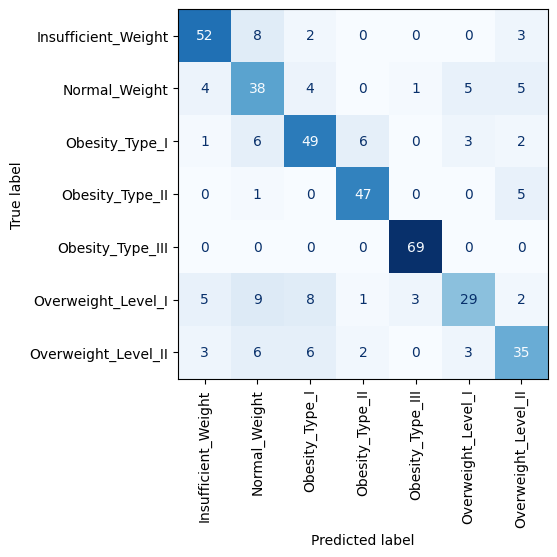

In [22]:
ConfusionMatrixDisplay.from_predictions(target_test, predicted_test, colorbar=False, cmap="Blues")
plt.xticks(rotation=90)
plt.show()

In [23]:
print(f"Accuracy: {accuracy_score(target_test, predicted_test)}")
print(f"Recall: {recall_score(target_test, predicted_test, average='macro')}")
print(f"Precision: {precision_score(target_test, predicted_test, average='macro')}")
print(f"F1-score: {f1_score(target_test, predicted_test,average='macro')}")
            

Accuracy: 0.7541371158392435
Recall: 0.7471339956095919
Precision: 0.750219510537527
F1-score: 0.7449926134452943


In [29]:
dummy_clf = DummyClassifier(strategy="uniform", random_state=1)

In [30]:
dummy_model = dummy_clf.fit(features_train, target_train)

In [31]:
dummy_predictions = dummy_model.predict(features_test)

In [32]:
print(f"Accuracy: {accuracy_score(target_test, dummy_predictions)}")
print(f"Recall: {recall_score(target_test, dummy_predictions, average='macro')}")
print(f"Precision: {precision_score(target_test, dummy_predictions, average='macro')}")
print(f"F1-score: {f1_score(target_test, dummy_predictions,average='macro')}")

Accuracy: 0.1276595744680851
Recall: 0.12669581200210725
Precision: 0.12867480519878444
F1-score: 0.1272973846711892


In [ ]:
features_train.info()

### References

http://helmut.knaust.info/BD/SixMajorReasons.pdf
https://blog.ed.gov/2022/08/the-importance-of-academic-advising-in-higher-education/#:~:text=Advisors%20assist%20in%20monitoring%20academic,major%20policies%20and%20procedures%20better.

Higher Education Students Performance Evaluation (Aug 14 2023)

Body Mass Index. (n.d.). Centers for Disease Control and Prevention.
https://www.cdc.gov/healthyweight/assessing/bmi/index.html#:~:text=Body%20Mass%20Index%20(BMI),
%20is,or%20health%20of%20an%20individual.

Defining Adult Overweight & Obesity. (n.d.). Centers for Disease Control and Prevention.
https://www.cdc.gov/obesity/basics/adult-defining.html

Estimation of obesity levels based on eating habits and physical condition. (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5H31Z.

Gozukara Bag, H.G., Yagin, F.H., Gormez, Y., González, P.P., Colak, C., Gülü, M., Badicu, G., Ardigò, L.P. 2023. Estimation of Obesity Levels through the Proposed Predictive Approach Based on Physical Activity and Nutritional Habits. Diagnostics. 13(18), 2949. https://doi.org/10.3390/diagnostics13182949

Nutrition, Physical Activity, and Obesity - Behavioral Risk Factor Surveillance System. (2023). Centers for Disease Control and Prevention.
https://data.cdc.gov/Nutrition-Physical-Activity-and-Obesity/ Nutrition-Physical-Activity-and-Obesity-Behavioral/hn4x-zwk7

Palechor, F.M., de la Hoz Manotas, A. (2019). Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico. Data Brief. 25, 104344. https://doi.org/10.1016/j.dib.2019.104344